# Primer modelo

Funcion de activacion **ReLU** y pesos inicializados de forma **aleatoria***

*Como ya se observo, se inicia por defecto con **glorot_normal**


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.figure as fig
import random
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170508288/170498071 [==============================] - 14s 0us/step


In [3]:
x_train_im = x_train
x_test_im = x_test

[7]


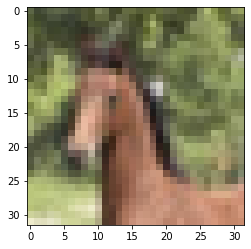

In [4]:
sample = random.randint(0,50000)
print(y_train[sample])
plt.imshow(x_train_im[sample])

In [5]:
# Re-shape the data and normalize
# In this case, I re shape the images with all RGB channels
x_train = x_train.reshape(50000, 32*32*3).astype('float32')/255
x_test = x_test.reshape(10000, 32*32*3).astype('float32')/255

In [6]:
inputs = keras.Input(shape = 3072,name='Input_Layer')

layer_1 = layers.Dense(128,
                       activation = 'relu' ,
                       name = 'h_layer1')(inputs)

layer_2 = layers.Dense(128,
                       activation = 'relu',
                       name = 'h_layer2')(layer_1)

output = layers.Dense(10,
                      activation = 'softmax',
                      name = 'Ouput_Layer')(layer_2)

model = keras.Model(inputs = inputs,
                    outputs = output)

# Definiendo metricas para tener en cuenta
my_metrics = [tf.keras.metrics.CategoricalAccuracy(),
              tf.keras.metrics.CategoricalCrossentropy(),
              tf.keras.metrics.Recall()]

model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics = my_metrics
    )

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input_Layer (InputLayer)    [(None, 3072)]            0         
                                                                 
 h_layer1 (Dense)            (None, 128)               393344    
                                                                 
 h_layer2 (Dense)            (None, 128)               16512     
                                                                 
 Ouput_Layer (Dense)         (None, 10)                1290      
                                                                 
Total params: 411,146
Trainable params: 411,146
Non-trainable params: 0
_________________________________________________________________


# Trainign the model for 100 epochs

In [8]:
# y_train convert to one_hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train)

In [9]:
# Definiendo el callback, en este caso early stopping
#my_callbacks = [tf.keras.callbacks.EarlyStopping(patience=2)]

history = model.fit(
    x = x_train,
    y = y_train_one_hot,
    batch_size = 32,
    epochs = 100,
    verbose = 1,
    #callbacks = my_callbacks,
    validation_split = 0.1
    )

Epoch 1/100
1094/1094 [==============================] - 9s 5ms/step - loss: 1.9071 - categorical_accuracy: 0.3064 - categorical_crossentropy: 1.9071 - recall: 0.0578 - val_loss: 1.8276 - val_categorical_accuracy: 0.3253 - val_categorical_crossentropy: 1.8276 - val_recall: 0.0854
Epoch 2/100
1094/1094 [==============================] - 5s 5ms/step - loss: 1.7308 - categorical_accuracy: 0.3759 - categorical_crossentropy: 1.7308 - recall: 0.1260 - val_loss: 1.6858 - val_categorical_accuracy: 0.3936 - val_categorical_crossentropy: 1.6858 - val_recall: 0.1585
Epoch 3/100
1094/1094 [==============================] - 5s 5ms/step - loss: 1.6590 - categorical_accuracy: 0.4039 - categorical_crossentropy: 1.6590 - recall: 0.1613 - val_loss: 1.6452 - val_categorical_accuracy: 0.4147 - val_categorical_crossentropy: 1.6452 - val_recall: 0.1831
Epoch 4/100
1094/1094 [==============================] - 5s 5ms/step - loss: 1.6051 - categorical_accuracy: 0.4296 - categorical_crossentropy: 1.6051 - recal

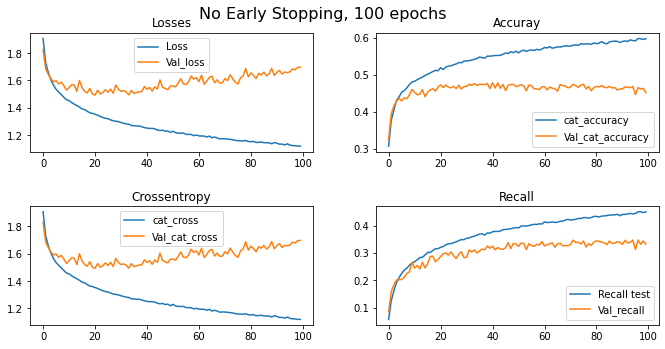

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Loss','Val_loss'])
ax1.set_title('Losses')

ax2.plot(history.history['categorical_accuracy'])
ax2.plot(history.history['val_categorical_accuracy'])
ax2.legend(['cat_accuracy','Val_cat_accuracy'])
ax2.set_title('Accuray')

ax3.plot(history.history['categorical_crossentropy'])
ax3.plot(history.history['val_categorical_crossentropy'])
ax3.legend(['cat_cross','Val_cat_cross'])
ax3.set_title('Crossentropy')

ax4.plot(history.history['recall'])
ax4.plot(history.history['val_recall'])
ax4.legend(['Recall test','Val_recall'])
ax4.set_title('Recall')
fig.tight_layout()
fig.suptitle('No Early Stopping, 100 epochs', fontsize=16)
fig.set_figwidth(10)
fig.set_figheight(5)

In [16]:
metrics_names = model.metrics_names

test_eval = model.evaluate(
    x = x_train,
    y = y_train_one_hot
    )

print('Metricas sobre Test Data')
print(metrics_names[0], ': ', test_eval[0])
print(metrics_names[1], ': ', test_eval[1])
print(metrics_names[2], ': ', test_eval[2])
print(metrics_names[3], ': ', test_eval[3])

1563/1563 [==============================] - 5s 3ms/step - loss: 1.3106 - categorical_accuracy: 0.5458 - categorical_crossentropy: 1.3106 - recall: 0.4081
Metricas sobre Test Data
loss :  1.3105601072311401
categorical_accuracy :  0.5458400249481201
categorical_crossentropy :  1.3105601072311401
recall :  0.4081000089645386


In [15]:
eval_test = model.evaluate(
    x = x_test,
    y = tf.keras.utils.to_categorical(y_test)
)

metrics_names = model.metrics_names

print('Metricas sobre Test Data')
print(metrics_names[0], ': ', eval_test[0])
print(metrics_names[1], ': ', eval_test[1])
print(metrics_names[2], ': ', eval_test[2])
print(metrics_names[3], ': ', eval_test[3])

313/313 [==============================] - 1s 3ms/step - loss: 1.6741 - categorical_accuracy: 0.4634 - categorical_crossentropy: 1.6741 - recall: 0.3399
Metricas sobre Test Data
loss :  1.6740801334381104
categorical_accuracy :  0.4634000062942505
categorical_crossentropy :  1.6740801334381104
recall :  0.3398999869823456


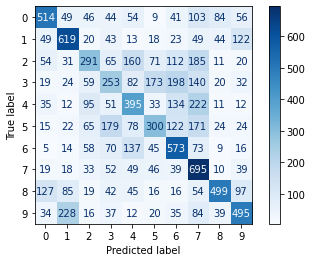

In [34]:
y_predict = model.predict(x_test)

y_pred = []
for predict in y_predict:
  y_pred.append(tf.math.argmax(predict).numpy())

cm = confusion_matrix(y_test, y_pred)
labels =[0,1,2,3,4,5,6,7,8,9]

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

disp.plot(cmap=plt.cm.Blues)
plt.show()